In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/Colab_Notebooks/perturbation_metric_test
!pip install anndata 
!pip install git+https://github.com/theislab/scgen.git
!pip install matplotlib
!pip install scanpy

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/perturbation_metric_test
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 2.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/theislab/scgen.git to /tmp/pip-req-build-hbf7hyfx
  Running command git clone --filter=blob:none --quiet https://github.com/theislab/scgen.git /tmp/pip-req-build-hbf7hyfx
  Resolved https://github.com/theislab/scgen.git to commit 06084773e56cad0dec340138441dee47a39af752
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import anndata
import scanpy as sc
import scgen
import pandas as pd  
import numpy as np
train = sc.read("./data/PapalexiSatija2021_eccite_RNA.h5ad")
sc.pp.normalize_total(train, target_sum=1e4)
sc.pp.log1p(train)

INFO:lightning_fabric.utilities.seed:Global seed set to 0


In [3]:
#correlation matrix 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
wasserstein=pd.read_csv("wasserstein.csv")
mmd=pd.read_csv("mmd.csv")
r_square=pd.read_csv("r_square.csv")
euclidean_d=pd.read_csv("euclidean_d.csv")
mae=pd.read_csv("mae.csv")
pearson=pd.read_csv("pearson.csv")
kl=pd.read_csv("kl.csv")
t_statistic=pd.read_csv("t_statistic.csv")
df=pd.DataFrame()
df["wasserstein"]=wasserstein['difference']
df["mmd"]=mmd['difference']
df["r_square"]=1/r_square['difference']
df["euclidean_d"]=euclidean_d['difference']
df["mae"]=mae['difference']
df["pearson"]=1/pearson['difference']
df["kl"]=kl['difference']
df["t_statistic"]=t_statistic['difference']
# df["genes"]=t_statistic['']
# t_statistic
print(df)

    wasserstein       mmd  r_square  euclidean_d       mae   pearson  \
0      0.010877  0.000116  2.345338    52.677902  0.171873  1.525259   
1      0.011194  0.000116  2.326636    52.846935  0.171279  1.534651   
2      0.011135  0.000116  2.316089    52.735222  0.170823  1.539179   
3      0.020620  0.000168  2.318903    52.538991  0.171283  1.527833   
4      0.025600  0.000244  2.318937    52.896205  0.171161  1.537243   
..          ...       ...       ...          ...       ...       ...   
63     0.020882  0.000202  2.324591    52.715551  0.171689  1.533159   
64     0.016313  0.000146  2.337111    52.947266  0.171714  1.538094   
65     0.035982  0.000386  2.459572    54.109955  0.177192  1.575274   
66     0.032591  0.000235  2.449061    54.106333  0.176053  1.574299   
67     0.021185  0.000173  2.313528    52.549957  0.171455  1.526697   

          kl  t_statistic  
0   0.000113     0.799280  
1   0.000112     0.796321  
2   0.000113     0.810428  
3   0.000328     0.8931

In [4]:
tab = pd.read_csv("e_distance.csv") 
print(tab)
stim=train[train.obs['perturbation']!="control"]
filtered_obs = stim.obs[stim.obs['perturbation'].map(stim.obs['perturbation'].value_counts()) >= 110]
obs_list=filtered_obs['perturbation'].unique()
list_stim=list(obs_list)
list_stim=pd.DataFrame(list_stim, columns=["name"])
list_stim
print(list_stim)
eDistance=[0]*3

edist=list_stim.merge(tab, on='name', how='left')
print(tab[tab['name']=='control'])
eDistance=eDistance+edist['distance'].values.tolist()
df['eDitance(pvalue)']=eDistance 
df 

    distance  pvalue  significant  pvalue_adj  significant_adj        name
0   0.017370   0.661        False    0.999996            False     STAT2g2
1   0.029570   0.007        False    0.325227            False      CAV1g4
2   0.315472   0.067        False    0.943171            False     STAT1g2
3   0.010651   0.016        False    0.581462            False      CD86g1
4   0.037443   0.001         True    0.094302            False      IRF7g2
..       ...     ...          ...         ...              ...         ...
94  0.333902   0.186        False    0.996138            False      SPI1g3
95  0.051816   0.766        False    0.999996            False  PDCD1LG2g2
96  0.336118   0.405        False    0.999913            False      CUL3g3
97  1.248222   0.001         True    0.094302            False      SPI1g2
98  2.594668   0.001         True    0.094302            False       MYCg4

[99 rows x 6 columns]
          name
0      STAT2g2
1       CAV1g4
2       CD86g1
3       IRF7g2
4 

,wasserstein,mmd,r_square,euclidean_d,mae,pearson,kl,t_statistic,eDitance(pvalue)
0,0.010877,0.000116,2.345338,52.677902,0.171873,1.525259,0.000113,0.799280,0.000000
1,0.011194,0.000116,2.326636,52.846935,0.171279,1.534651,0.000112,0.796321,0.000000
2,0.011135,0.000116,2.316089,52.735222,0.170823,1.539179,0.000113,0.810428,0.000000
3,0.020620,0.000168,2.318903,52.538991,0.171283,1.527833,0.000328,0.893172,0.017370
4,0.025600,0.000244,2.318937,52.896205,0.171161,1.537243,0.000660,0.830229,0.029570
...,...,...,...,...,...,...,...,...,...
63,0.020882,0.000202,2.324591,52.715551,0.171689,1.533159,0.000444,0.822634,0.016092
64,0.016313,0.000146,2.337111,52.947266,0.171714,1.538094,0.000260,0.823440,0.012394
65,0.035982,0.000386,2.459572,54.109955,0.177192,1.575274,0.000412,1.292766,0.134912
66,0.032591,0.000235,2.449061,54.106333,0.176053,1.574299,0.000320,1.295769,0.122679


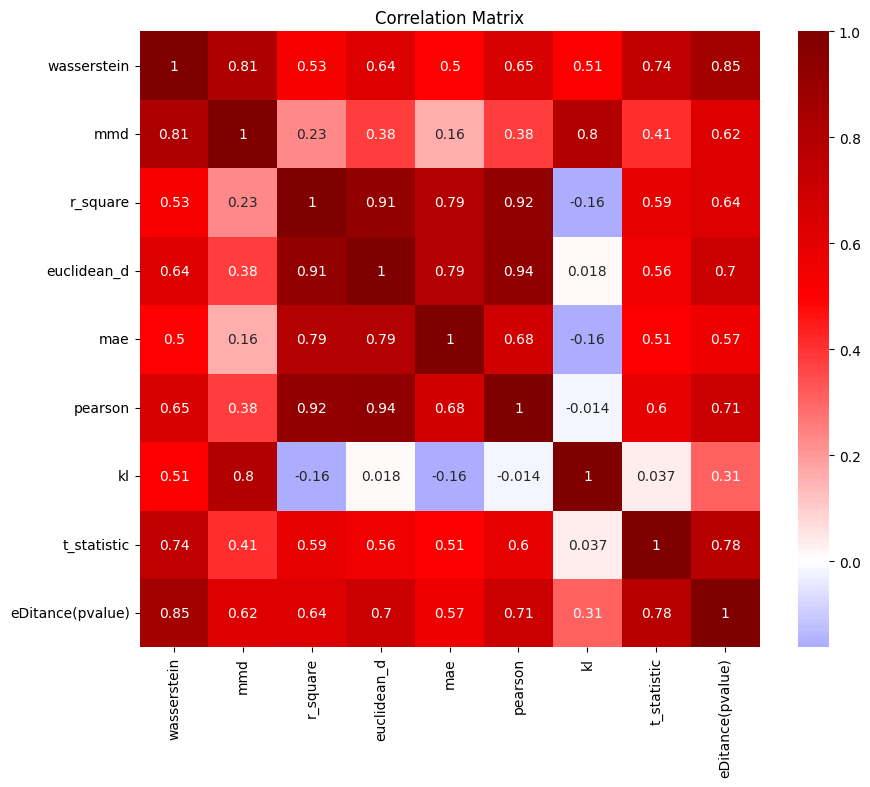

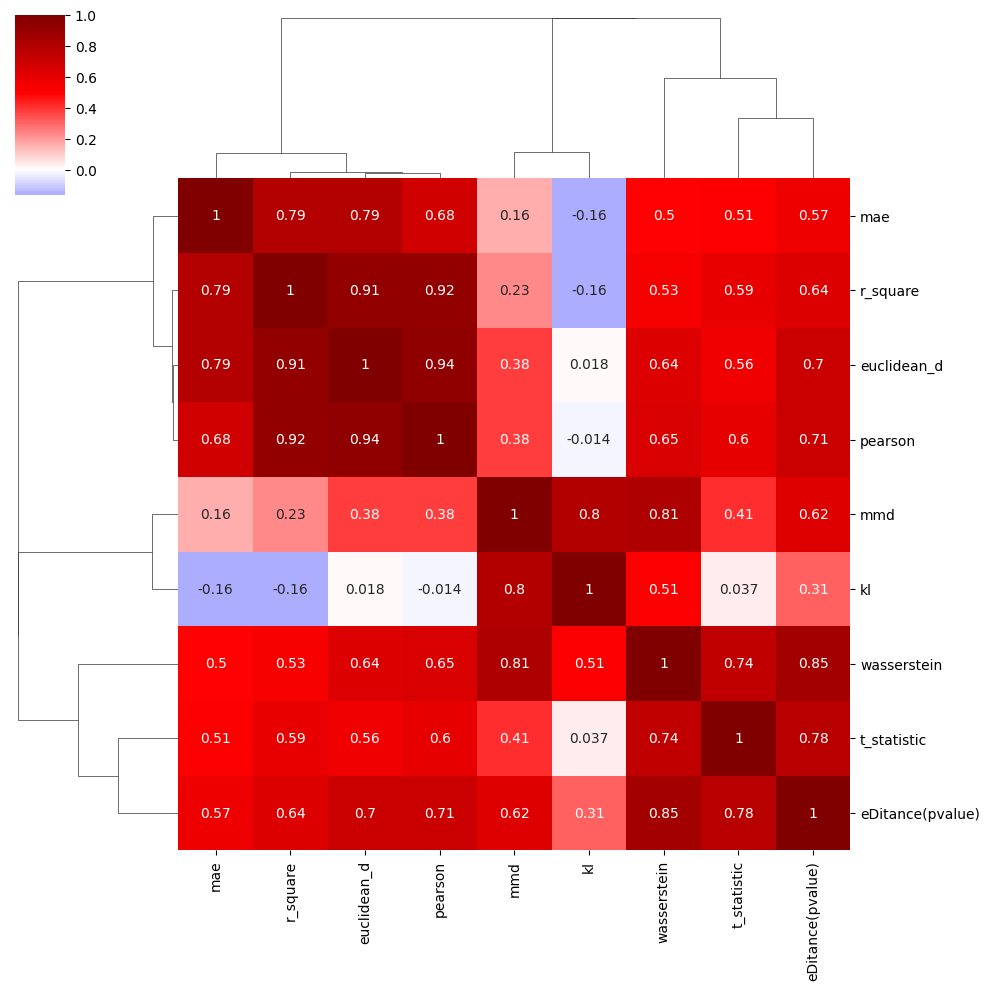

In [5]:
corr_matrix = df.corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic',center=0)
plt.title('Correlation Matrix')
plt.show()

sns.clustermap(corr_matrix, metric="correlation", method="single",annot=True, cmap='seismic',center=0)